In [5]:
import numpy as np 
import pandas as pd

In [6]:
#######################################################################
#######################################################################
# Anaylsis of Census Data: 
#######################################################################
#######################################################################

In [13]:
# Reading census data 
df = pd.read_csv("/Users/mac/Desktop/census.csv")

# Selecting neighborhoods and proportions
new_df_n = df[['Neighborhood','White Proportion','Black Proportion']]

# Selecting sub- neighborhoods and proportions
new_df_sn = df[['Primary Sub-Neighborhood','White Proportion','Black Proportion']]

# Removing the % signs 
new_df_n['White Proportion'] = list(map(lambda x: x[:-1], new_df_n['White Proportion'].values))
new_df_n['Black Proportion'] = list(map(lambda x: x[:-1], new_df_n['Black Proportion'].values))
new_df_sn['White Proportion'] = list(map(lambda x: x[:-1], new_df_sn['White Proportion'].values))
new_df_sn['Black Proportion'] = list(map(lambda x: x[:-1], new_df_sn['Black Proportion'].values))

# Casting them as float
new_df_n['White Proportion'] = new_df_n['White Proportion'].astype(float)
new_df_n['Black Proportion'] = new_df_n['Black Proportion'].astype(float)
new_df_sn['White Proportion'] = new_df_sn['White Proportion'].astype(float)
new_df_sn['Black Proportion'] = new_df_sn['Black Proportion'].astype(float)

new_df_sn.dropna()

print(new_df_n)
new_df_n.info()

print(new_df_sn)
new_df_sn.info()

      Neighborhood  White Proportion  Black Proportion
0         Brighton             62.27              5.84
1         Brighton             79.28              5.94
2         Brighton             70.95              6.16
3         Brighton             74.78              7.33
4         Brighton             67.63             10.35
..             ...               ...               ...
175       Back Bay              0.00              0.00
176    East Boston              0.00              0.00
177    East Boston              0.00              0.00
178    Beacon Hill              0.00              0.00
179  Jamaica Plain             65.38             34.62

[180 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Neighborhood      180 non-null    object 
 1   White Proportion  180 non-null    float64
 2   Black Proportion  1

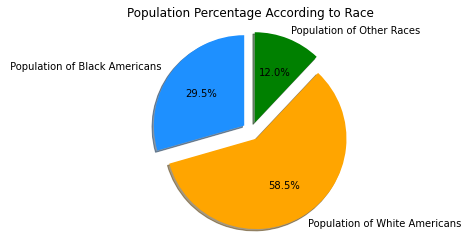

In [14]:
# Creating a pie chart to visualize the population proportion according to race
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
# Pie chart
labels = ' Population of Black Americans ', 'Population of White Americans', 'Population of Other Races'
sizes = [(195752/664674),(389001/664674),(79921/664674)]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
plt.title("Population Percentage According to Race")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = [ "dodgerblue", "orange","green"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
# Creating a list of the Predominant white neighborhoods
# ------------------------------------------------------
w_n = new_df_n.groupby('Neighborhood', axis= 0)['White Proportion'].mean()
w_n = w_n.to_frame()
b_n = new_df_n.groupby('Neighborhood', axis= 0)['Black Proportion'].mean()
b_n = b_n.to_frame()
c = w_n[w_n['White Proportion'] > b_n['Black Proportion']]
print(c.count())
w_neighborhoods = c.index.tolist()
w_neighborhoods

White Proportion    19
dtype: int64


['Allston',
 'Back Bay',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Downtown',
 'East Boston',
 'Fenway',
 'Harbor Islands',
 'Jamaica Plain',
 'Longwood Medical Area',
 'Mission Hill',
 'North End',
 'Roslindale',
 'South Boston',
 'South Boston Waterfront',
 'South End',
 'West End',
 'West Roxbury']

In [17]:
# Creating a list of the Predominant Black neighborhoods
# ------------------------------------------------------
b_n[b_n['Black Proportion']> w_n['White Proportion']]
b_n[b_n['Black Proportion']> w_n['White Proportion']].count()
d = b_n[b_n['Black Proportion']> w_n['White Proportion']]
print(d.count())
b_neighborhoods = d.index.tolist()
b_neighborhoods

Black Proportion    4
dtype: int64


['Dorchester', 'Hyde Park', 'Mattapan', 'Roxbury']

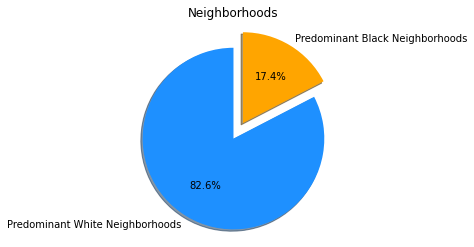

In [18]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'Predominant White Neighborhoods', 'Predominant Black Neighborhoods'
sizes = [(19/23),(4/23)]
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
plt.title("Neighborhoods")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = [ "dodgerblue", "orange","green"])

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [19]:
# Creating a list of the Predominant white subneighborhoods
# ------------------------------------------------------
w_sn = new_df_sn.groupby('Primary Sub-Neighborhood', axis= 0)['White Proportion'].mean()
w_sn = w_sn.to_frame()
b_sn = new_df_sn.groupby('Primary Sub-Neighborhood', axis= 0)['Black Proportion'].mean()
b_sn = b_sn.to_frame()
a = w_sn[w_sn['White Proportion']>b_sn['Black Proportion']]
print(a.count())
# List of predomoinant white sub-neighborhoods
w_subneighborhoods = a.index.tolist()
w_subneighborhoods

White Proportion    61
dtype: int64


['Aberdeen',
 'Adams Village',
 'Allston',
 'Ashcroft',
 'Ashmount',
 'Back Bay',
 'Back Bay West / Back Bay',
 'Bay Village',
 'Bellevue Hill',
 'Boston',
 'Brighton',
 'Brook Farm',
 'Bunker Hill',
 'Central Maverick Square/Paris Square',
 'Central Village',
 'Centre South',
 'Charlestown',
 'Chestnut Hill Neighborhood Association',
 'China Town',
 'City Point',
 'Clam Point',
 'Columbus',
 'Columbus Park/Andrew Square',
 'D Street / West Broadway',
 'Downtown Crossing',
 'Eagle Hill',
 'East Boston',
 'Egleston Square',
 'Fenway-Kenmore',
 'Forest Hills/Woodbourne',
 'Fort Hill',
 'Frederick Douglas Square Historic District',
 'Harbor View/Orient Heights',
 'High Street Hill',
 'Hunnwell Hill',
 'Jamaica Hills',
 'Jamaica Plain',
 'Jeffries Point',
 'Jones Hill',
 'Lower Allston',
 'Medford Street/The Neck',
 'Metropolitan Hill/Beech Street',
 'Mission Hill',
 'Neponset/Port Norfolk',
 'Oak Square',
 'Orient Heights',
 'Roslindale',
 'Roslindale ',
 'Roxbury ',
 'Salisbury Road-Core

In [20]:
# Creating a list of the Predominant black subneighborhoods
# ------------------------------------------------------
b_sn[b_sn['Black Proportion'] > w_sn['White Proportion']]
print(b_sn[b_sn['Black Proportion']>w_sn['White Proportion']].count())
b = b_sn[b_sn['Black Proportion'] > w_sn['White Proportion']]
# List of predomoinant black sub-neighborhoods
b_subneighborhoods = b.index.tolist()
b_subneighborhoods

Black Proportion    25
dtype: int64


['Bowdoin North/Mount Bodoin',
 'Codman Square',
 'Dorcehster Center',
 'Dorchester',
 'Dudley/Brunswick King',
 'Fields Corner Wester',
 'Franklin Field South',
 'Georgetown',
 'Grove Hall',
 'Hyde Park',
 'Lower Roxbury',
 'Mattapan',
 'Meeting House Hill',
 'Milton Hill',
 'Nubian Square',
 'Roxbury',
 'Southern Mattapan',
 'St. Marks',
 'Washington /Mount Hope',
 'Washington Hill',
 'Washington Park',
 'Washington Park ',
 'Wellington Hill',
 'West Codman Hill/ West Lower Mills',
 'West Street/River Street']

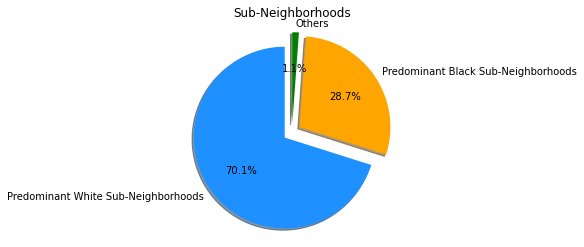

In [21]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'Predominant White Sub-Neighborhoods', 'Predominant Black Sub-Neighborhoods', 'Others'
sizes = [(61/87),(25/87),(1/87)]
explode = (0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
plt.title("Sub-Neighborhoods")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = [ "dodgerblue", "orange","green"])


ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [115]:
#######################################################################
#######################################################################
# WBUR and Census Data Analysis: 
#######################################################################
#######################################################################

In [25]:
# Working with the WBUR data set 
# Aggregating all the five years articles 

data1 = pd.read_csv("/Users/mac/Desktop/wbur2018.csv")
data2 = pd.read_csv("/Users/mac/Desktop/wbur2017.csv")
data3 = pd.read_csv("/Users/mac/Desktop/wbur2016.csv")
data4 = pd.read_csv("/Users/mac/Desktop/wbur2015.csv")
data5 = pd.read_csv("/Users/mac/Desktop/wbur2014.csv")

data_frame = pd.concat([data1,data2,data3,data4,data5], ignore_index=True)
data_frame

,Unnamed: 0,text
0,0,A Massachusetts pharmacist convicted for his r...
1,1,On this morning we find almost the entire stat...
2,2,If you're making outdoor plans in Greater Bost...
3,3,A lack of independent testing laboratories is ...
4,4,The big nor'easter continues to spin out in th...
...,...,...
12651,3972,Showers are in the forecast for the next sever...
12652,3973,Iraqi helicopter gunships struck suspected ins...
12653,3974,Massachusetts Gov. Deval Patrick is urging the...
12654,3975,As warm and very humid air attempts to move no...


In [26]:
# Cleaning the data set 
# -----------------------

# Special characters 
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "\xc2", "\xa0",
             "\x80", "\x9c", "\x99", "\x94", "\xad", "\xe2", "\x9d"]

# Removing Special characters 
for char in spec_chars:
    data_frame['text'] = data_frame['text'].str.replace(char, ' ')

# Lowercase all the words
data_frame['text'] = data_frame['text'].apply(lambda x: x.lower())



In [7]:
# Implementation on Neighborhoods 
# ----------------------------------------------------------

In [27]:
# Finding the white neighborhoods that were mentioned 
# ----------------------------------------------
data_arr = data_frame['text']
# -------------------------------------
wn_df = pd.DataFrame(columns =['Subs'])
wn_df['Subs'] = w_neighborhoods
# -------------------------------------

mentions=[]
for neighborhood in wn_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue
    mentions.append(count)

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[62, 106, 235, 79, 86, 229, 144, 265, 8, 105, 6, 21, 37, 56, 205, 9, 100, 9, 56]
Count    1818
dtype: int64


In [29]:
# Creating a csv of white neighborhoods mentioned
# ------------------------------------------------------
new_df = pd.concat([wn_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection.to_csv('white_neigh_mention.csv')

In [30]:
# Finding the Black neighborhoods that were mentioned 
# ----------------------------------------------
bn_df = pd.DataFrame(columns =['Subs'])
bn_df['Subs'] = b_neighborhoods
# ----------------------------------------------

mentions=[]
for neighborhood in bn_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue
    mentions.append(count)
    
mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[380, 62, 116, 291]
Count    849
dtype: int64


In [31]:
# Creating a csv of black neighborhoods mentioned
# ------------------------------------------------------
new_df = pd.concat([bn_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection.to_csv('black_neigh_mention.csv')

In [34]:
# Implementation on Sub Neighborhoods 
# -------------------------------------
# white sub-neighborhoods mentioned
ws_df = pd.DataFrame(columns =['Subs'])
ws_df['Subs'] = w_subneighborhoods
# ------------------------------------

mentions=[]
for neighborhood in ws_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue 
    mentions.append(count)
    
mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[1, 0, 62, 0, 0, 106, 0, 2, 1, 6781, 79, 0, 17, 0, 0, 0, 86, 0, 0, 1, 0, 59, 0, 0, 16, 2, 144, 2, 0, 0, 2, 0, 0, 0, 0, 0, 105, 2, 1, 1, 0, 0, 21, 0, 2, 3, 56, 56, 289, 0, 45, 9, 205, 100, 0, 1, 1, 0, 0, 9, 0]
Count    8267
dtype: int64


In [35]:
# Printing the list of white sub neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([ws_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection.to_csv('white_subneigh_mention.csv')


In [33]:
# Finding the Black neighborhoods that were mentioned 
# ---------------------------------------------------
s_df = pd.DataFrame(columns =['Subs'])
s_df['Subs'] = b_subneighborhoods
# -------------------------------

mentions=[]
for neighborhood in s_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
    mentions.append(count)
    

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mention.sum())

Count    878
dtype: int64


In [36]:
# Printing the list of black sub neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([s_df,mention],axis=1)
selection = new_df.loc[new_df['Count']!=0]
selection.to_csv('black_subneigh_mention.csv')

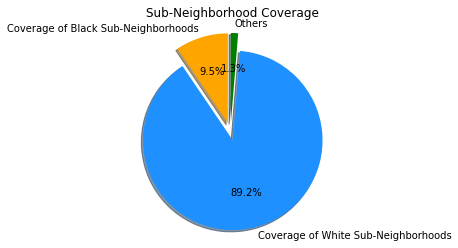

In [38]:
import matplotlib.pyplot as plt
# Pie chart
labels = 'Coverage of Black Sub-Neighborhoods', 'Coverage of White Sub-Neighborhoods', 'Others'
sizes = [(878/9265),(8267/9265),(120/9265)]
explode = (0.1, 0.1, 0.1)  

fig1, ax1 = plt.subplots()
plt.title("Sub-Neighborhood Coverage")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = [ "orange","dodgerblue","green"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#######################################################################
#######################################################################
# WGBH and Census Data Analysis: 
#######################################################################
#######################################################################

In [41]:
data1 = pd.read_csv("/Users/mac/Desktop/wgbh_data_2018.csv")
data2 = pd.read_csv("/Users/mac/Desktop/wgbh_data_2017.csv")
data3 = pd.read_csv("/Users/mac/Desktop/wgbh_data_2016.csv")
data4 = pd.read_csv("/Users/mac/Desktop/wgbh_data_2015.csv")
data_frame = pd.concat([data1,data2,data3,data4], ignore_index=True)

data_frame

,Unnamed: 0,Article Headline,Article Content
0,0,[Landmark Boston Restaurant L'Espalier Closes ...,[A landmark Boston restaurant is closing after...
1,1,[BPR Full Show: 12/31/18],"[Today on the show:, · Jon Meacham on his new ..."
2,2,[Gov. Baker Signs Bill Extending Unemployment ...,[Gov. Charlie Baker on Monday morning signed a...
3,3,[National Grid Lockout Poised To Spill Into Ne...,"[Unions representing 1,250 locked out gas work..."
4,4,[MassDOT Bicycle Draft Plan 'A Step In The Rig...,[More and more people are getting around by bi...
...,...,...,...
6969,2028,[From The WGBH Vault: Mayor Kevin White's 13th...,[Boston Mayor Marty Walsh delivers his first S...
6970,2029,[Gov. Baker Names Pollack To Serve As Transpor...,[Gov. Charlie Baker has filled one of the key ...
6971,2030,[Harvard-Educated Deval Patrick Signs On As An...,[Former Massachusetts Gov. Deval Patrick has s...
6972,2031,[Did The U.S. 'Blow It' By Snubbing The Paris ...,"[, Sunday's march against terrorism in Paris w..."


In [42]:
# Cleaning the data set 
data_frame['Article Content'] = data_frame['Article Content'].astype(str)
data_frame['Article Headline'] = data_frame['Article Headline'].astype(str)
# Special characters 
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–", "\xc2", "\xa0",
             "\x80", "\x9c", "\x99", "\x94", "\xad", "\xe2", "\x9d"]

# Removing Special characters z
for char in spec_chars:
    data_frame['Article Content'] = data_frame['Article Content'].str.replace(char, ' ')

# Lowercase all the words
data_frame['Article Content'] = data_frame['Article Content'].apply(lambda x: x.lower())

data_frame

,Unnamed: 0,Article Headline,Article Content
0,0,[Landmark Boston Restaurant L'Espalier Closes ...,a landmark boston restaurant is closing after...
1,1,[BPR Full Show: 12/31/18],today on the show · jon meacham on his new ...
2,2,[Gov. Baker Signs Bill Extending Unemployment ...,gov charlie baker on monday morning signed a...
3,3,[National Grid Lockout Poised To Spill Into Ne...,unions representing 1 250 locked out gas work...
4,4,[MassDOT Bicycle Draft Plan 'A Step In The Rig...,more and more people are getting around by bi...
...,...,...,...
6969,2028,[From The WGBH Vault: Mayor Kevin White's 13th...,boston mayor marty walsh delivers his first s...
6970,2029,[Gov. Baker Names Pollack To Serve As Transpor...,gov charlie baker has filled one of the key ...
6971,2030,[Harvard-Educated Deval Patrick Signs On As An...,former massachusetts gov deval patrick has s...
6972,2031,[Did The U.S. 'Blow It' By Snubbing The Paris ...,sunday s march against terrorism in paris w...


In [95]:
# ----------------------------------------------------------
# Implementation on Neighborhoods 
# ----------------------------------------------------------

In [96]:
# Finding the white neighborhoods that were mentioned 
# ----------------------------------------------
data_arr = data_frame['Article Content']
# -------------------------------------
wn_df = pd.DataFrame(columns =['Subs'])
wn_df['Subs'] = w_neighborhoods
# -------------------------------------

mentions=[]
for neighborhood in wn_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue
    mentions.append(count)

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[28, 48, 149, 50, 45, 132, 56, 92, 3, 64, 2, 9, 36, 43, 86, 5, 50, 2, 26]
Count    926
dtype: int64


In [97]:
# Printing the list of white neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([wn_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection

,Subs,Count
0,Allston,28
1,Back Bay,48
2,Beacon Hill,149
3,Brighton,50
4,Charlestown,45
5,Downtown,132
6,East Boston,56
7,Fenway,92
8,Harbor Islands,3
9,Jamaica Plain,64


In [98]:
# This is done for the Black neighborhoods
# ----------------------------------------------
bn_df = pd.DataFrame(columns =['Subs'])
bn_df['Subs'] = b_neighborhoods
# ----------------------------------------------

mentions=[]
for neighborhood in bn_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue
    mentions.append(count)
    
mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[197, 31, 75, 173]
Count    476
dtype: int64


In [99]:
# Printing the list of black neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([bn_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection

,Subs,Count
0,Dorchester,197
1,Hyde Park,31
2,Mattapan,75
3,Roxbury,173


In [ ]:
# ----------------------------------------------------------
# Implementation on Sub Neighborhoods 
# ----------------------------------------------------------

In [100]:
# white sub-neighborhoods mentioned
ws_df = pd.DataFrame(columns =['Subs'])
ws_df['Subs'] = w_subneighborhoods
# ------------------------------------

mentions=[]
for neighborhood in ws_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
            continue 
    mentions.append(count)
    
mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mentions)
print(mention.sum())

[0, 0, 28, 0, 0, 48, 0, 1, 0, 4299, 50, 0, 12, 0, 0, 0, 45, 0, 0, 0, 0, 16, 0, 0, 9, 0, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 64, 1, 1, 0, 0, 0, 9, 0, 1, 2, 43, 43, 167, 0, 29, 2, 86, 50, 0, 0, 0, 0, 0, 2, 0]
Count    5064
dtype: int64


In [101]:
# Printing the list of white sub neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([ws_df,mention],axis=1)
new_df
selection = new_df.loc[new_df['Count']!=0]
selection

,Subs,Count
2,Allston,28
5,Back Bay,48
7,Bay Village,1
9,Boston,4299
10,Brighton,50
12,Bunker Hill,12
16,Charlestown,45
21,Columbus,16
24,Downtown Crossing,9
26,East Boston,56


In [102]:
# Black sub-neighborhoods mentioned
s_df = pd.DataFrame(columns =['Subs'])
s_df['Subs'] = b_subneighborhoods
# -------------------------------

mentions=[]
for neighborhood in s_df['Subs'].str.lower():
    count = 0
    for article in data_arr: 
        if neighborhood in article:
            count += 1
    mentions.append(count)
    

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mention.sum())

Count    492
dtype: int64


In [103]:
# Printing the list of black sub neighborhoods mentioned 
# ------------------------------------------------------
new_df = pd.concat([s_df,mention],axis=1)
selection = new_df.loc[new_df['Count']!=0]
selection

,Subs,Count
1,Codman Square,4
3,Dorchester,197
7,Georgetown,7
8,Grove Hall,2
9,Hyde Park,31
10,Lower Roxbury,3
11,Mattapan,75
15,Roxbury,173


In [ ]:
#######################################################################
#######################################################################
# Homoicide Coverage 
#######################################################################
#######################################################################

In [41]:
homoicide_df = pd.read_csv('Homicide List Boston 2014-2018.csv')
homoicide_df.head()

,First Name,Last Name,Year,Race,Gender,Age,Unnamed: 6
0,Clayborn,Blair,2018,B,M,58,NaN
1,Alexander,Allen,2018,B,M,55,NaN
2,Darryl,Nobles,2018,B,M,53,NaN
3,Karim,Blount,2018,B,M,42,NaN
4,Joao,Alves,2018,B,M,42,NaN


In [42]:
a = homoicide_df.groupby("Year")
homoicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   First Name  255 non-null    object 
 1   Last Name   255 non-null    object 
 2   Year        255 non-null    int64  
 3   Race        255 non-null    object 
 4   Gender      252 non-null    object 
 5   Age         255 non-null    int64  
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.1+ KB


In [43]:
f_name = homoicide_df['First Name']
l_name = homoicide_df['Last Name']
f_name = f_name.str.lower()
l_name = l_name.str.lower()

f_df = pd.DataFrame(columns =['First Name'])
l_df = pd.DataFrame(columns =['Last Name'])
f_df['First Name'] = f_name
l_df['Last Name'] = l_name

In [44]:
mentions=[]
for i,j in zip(f_df['First Name'],l_df['Last Name']):
    count = 0
    for article in data_arr: 
        if i in article.split() and j in article.split():
            count += 1
    mentions.append(count)
    

mention= pd.DataFrame(columns =['Count'])
mention['Count'] = mentions
print(mention.sum())

Count    456
dtype: int64


In [45]:
new_df = pd.concat([homoicide_df,mention],axis=1)
selection = new_df.loc[new_df['Count']!=0]
selection

,First Name,Last Name,Year,Race,Gender,Age,Unnamed: 6,Count
0,Clayborn,Blair,2018,B,M,58,NaN,5
1,Alexander,Allen,2018,B,M,55,NaN,3
6,Deondra,Lee,2018,B,M,36,NaN,2
8,Anthony,Young,2018,B,M,33,NaN,24
9,Steven,Wilson,2018,B,M,33,NaN,7
...,...,...,...,...,...,...,...,...
244,Adrian,Gonzalez,2014,W H,M,17,NaN,4
248,Edward,Lawn,2014,W N,M,68,NaN,1
249,Sean,Dwyer,2014,W N,M,29,NaN,1
252,Janmarcos,Pena,2014,WH,M,9,NaN,2


In [55]:
new_df.pivot_table(index='Race',values='Count', aggfunc=np.sum)

,Count
Race,
A,0
A B,10
B,285
B H,2
B N,87
B N H,0
C B,0
CV,0
H,11


In [56]:
new_df.pivot_table(index='Gender',values='Count', aggfunc=np.sum)

,Count
Gender,
F,24
H,0
M,431
M,1


In [57]:
new_df.pivot_table(index='Age',values='Count', aggfunc=np.sum)

,Count
Age,
3,1
4,0
6,0
9,2
15,3
16,0
17,6
18,30
19,2
